# Linear Regression with PyTorch

This is a simple linear regression example.

The optimization is entirely coded manually
- loss function
- gradient descent. 

Only the pytorch `backward` function is used to update the loss.

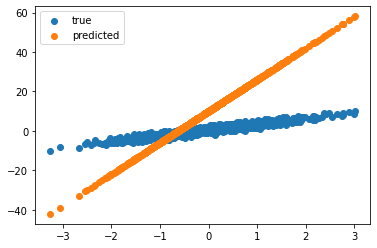

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable


class Model:
    def __init__(self):
        self.W = Variable(torch.as_tensor(16.), requires_grad=True)
        self.b = Variable(torch.as_tensor(10.), requires_grad=True)

    def __call__(self, x):
        return self.W * x + self.b


TRUE_W = 3.0  # slope
TRUE_b = 0.5  # intercept

NUM_EXAMPLES = 1000

X = torch.normal(0.0, 1.0, size=(NUM_EXAMPLES,))
noise = torch.normal(0.0, 1.0, size=(NUM_EXAMPLES,))
y = X * TRUE_W + TRUE_b + noise

model = Model()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X).detach().numpy(), label="predicted")
plt.legend()
plt.show()

Epoch 0: Loss: 247.5915985107422
Epoch 1: Loss: 163.19540405273438
Epoch 2: Loss: 107.67484283447266
Epoch 3: Loss: 71.15013885498047
Epoch 4: Loss: 47.121944427490234
Epoch 5: Loss: 31.314655303955078
Epoch 6: Loss: 20.91557502746582
Epoch 7: Loss: 14.074344635009766
Epoch 8: Loss: 9.573698997497559
Epoch 9: Loss: 6.612846851348877
Epoch 10: Loss: 4.664976596832275
Epoch 11: Loss: 3.3835177421569824
Epoch 12: Loss: 2.540472984313965
Epoch 13: Loss: 1.9858506917953491
Epoch 14: Loss: 1.6209745407104492
Epoch 15: Loss: 1.3809282779693604
Epoch 16: Loss: 1.2230052947998047
Epoch 17: Loss: 1.119109869003296
Epoch 18: Loss: 1.0507580041885376
Epoch 19: Loss: 1.00579035282135


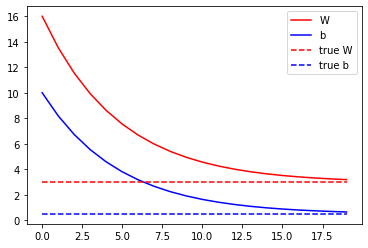

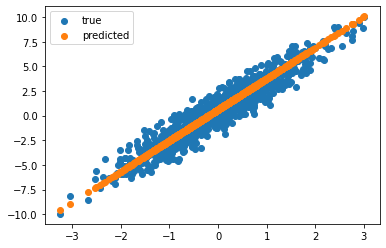

In [2]:
def loss(y, y_pred):
    return torch.square(y_pred - y).mean()


def train(model, X, y, lr=0.01):
    current_loss = loss(y, model(X))
    current_loss.backward()

    with torch.no_grad():
        model.W -= model.W.grad.data * lr
        model.b -= model.b.grad.data * lr

    model.W.grad.data.zero_()
    model.b.grad.data.zero_()


Ws, bs = [], []
epochs = 20
for epoch in range(epochs):
    with torch.no_grad():
        Ws.append(model.W.numpy().item())
        bs.append(model.b.numpy().item())
        current_loss = loss(y, model(X))
    train(model, X, y, lr=0.1)
    print(f"Epoch {epoch}: Loss: {current_loss.numpy()}")

plt.figure()
plt.plot(range(epochs), Ws, 'r', range(epochs), bs, 'b')
plt.plot([TRUE_W] * epochs, 'r--', [TRUE_b] * epochs, 'b--')
plt.legend(['W', 'b', 'true W', 'true b'])
plt.show()

plt.figure()
plt.scatter(X, y, label="true")
plt.scatter(X, model(X).detach().numpy(), label="predicted")
plt.legend()
plt.show()